# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 


**Approach - A Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


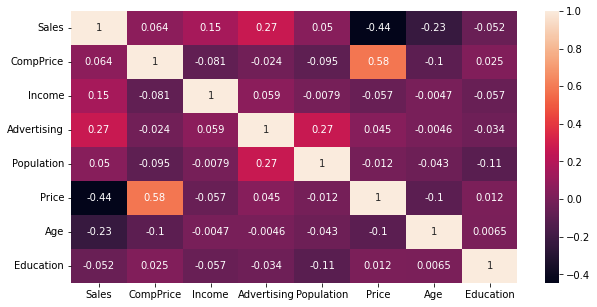

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

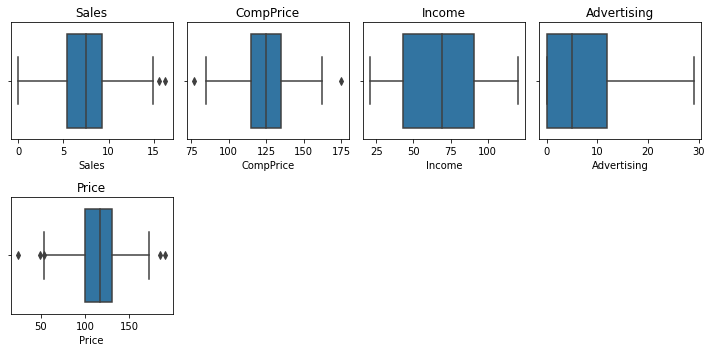

In [6]:
# Checking the outlier
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
sns.boxplot(x='Sales', data = data)
plt.title('Sales')

plt.subplot(2,4,2)
sns.boxplot(x='CompPrice', data = data)
plt.title('CompPrice')

plt.subplot(2,4,3)
sns.boxplot(x='Income', data = data)
plt.title('Income')

plt.subplot(2,4,4)
sns.boxplot(x='Advertising', data = data)
plt.title('Advertising')

plt.subplot(2,4,5)
sns.boxplot(x='Price', data = data)
plt.title('Price')

plt.tight_layout()

In [7]:
#remove the outlier
data.drop(data.index[data['Sales']>14], inplace=True)
data.drop(data.index[data['CompPrice']>165], inplace=True)
data.drop(data.index[data['CompPrice']<80], inplace=True)
data.drop(data.index[data['Price']>175], inplace=True)
data.drop(data.index[data['Price']<60], inplace=True)
data.shape

(389, 11)

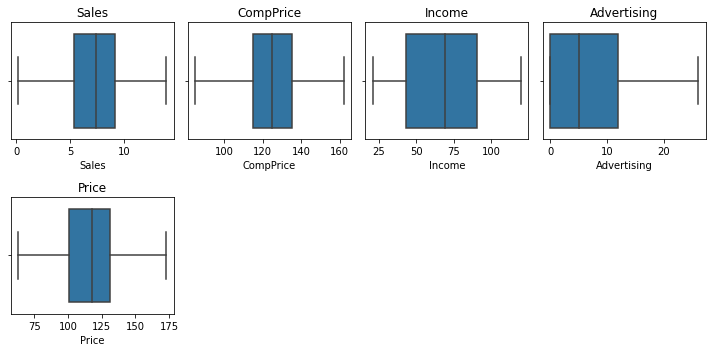

In [8]:
# Checking the outliers
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
sns.boxplot(x='Sales', data = data)
plt.title('Sales')

plt.subplot(2,4,2)
sns.boxplot(x='CompPrice', data = data)
plt.title('CompPrice')

plt.subplot(2,4,3)
sns.boxplot(x='Income', data = data)
plt.title('Income')

plt.subplot(2,4,4)
sns.boxplot(x='Advertising', data = data)
plt.title('Advertising')

plt.subplot(2,4,5)
sns.boxplot(x='Price', data = data)
plt.title('Price')

plt.tight_layout()

In [9]:
#One Hot Encoded Data Frame

data1 = pd.get_dummies(data, columns=['ShelveLoc','US','Urban'], drop_first=True)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,1,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [10]:
data1['Sales'].describe()

count    389.000000
mean       7.418689
std        2.678337
min        0.160000
25%        5.360000
50%        7.430000
75%        9.140000
max       13.910000
Name: Sales, dtype: float64

In [11]:
#Adding new column sales_status

data1.loc[data1['Sales']>=7.4 , 'sales_status'] = 'High'
data1.loc[data1['Sales']<7.4 , 'sales_status'] = 'Low'
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,sales_status
0,9.50,138,73,11,276,120,42,17,0,0,1,1,High
1,11.22,111,48,16,260,83,65,10,1,0,1,1,High
2,10.06,113,35,10,269,80,59,12,0,1,1,1,High
3,7.40,117,100,4,466,97,55,14,0,1,1,1,High
4,4.15,141,64,3,340,128,38,13,0,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,High
396,6.14,139,23,3,37,120,55,11,0,1,1,0,Low
397,7.41,162,26,12,368,159,40,18,0,1,1,1,High
398,5.94,100,79,7,284,95,50,12,0,0,1,1,Low


In [12]:
data1.drop('Sales', axis=1, inplace=True)

In [13]:
data1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,sales_status
0,138,73,11,276,120,42,17,0,0,1,1,High
1,111,48,16,260,83,65,10,1,0,1,1,High
2,113,35,10,269,80,59,12,0,1,1,1,High
3,117,100,4,466,97,55,14,0,1,1,1,High
4,141,64,3,340,128,38,13,0,0,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,High
396,139,23,3,37,120,55,11,0,1,1,0,Low
397,162,26,12,368,159,40,18,0,1,1,1,High
398,100,79,7,284,95,50,12,0,0,1,1,Low


In [14]:
#Checking whether the dataset is balanced or imbalanced
data1['sales_status'].value_counts()

High    198
Low     191
Name: sales_status, dtype: int64

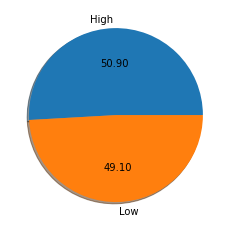

In [15]:
#Balanced Dataset
plt.pie(data1['sales_status'].value_counts(), autopct='%0.2f', labels=['High', 'Low'], shadow=True)
plt.show()

In [16]:
#Encoding the data
label_en = LabelEncoder()
for i in range(0, data1.shape[1]):
    if data1.dtypes[i] == 'object':
        data1[data1.columns[i]] = label_en.fit_transform(data1[data1.columns[i]])
        
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,sales_status
0,138,73,11,276,120,42,17,0,0,1,1,0
1,111,48,16,260,83,65,10,1,0,1,1,0
2,113,35,10,269,80,59,12,0,1,1,1,0
3,117,100,4,466,97,55,14,0,1,1,1,0
4,141,64,3,340,128,38,13,0,0,0,1,1


## Splitting dataset

In [17]:
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]

## Model Building 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34, random_state=12)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 11), (133, 11), (256,), (133,))

## Model Training & Evaluation 

In [20]:
rf_model = RandomForestClassifier()

In [21]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred_train = rf_model.predict(X_train)

In [23]:
accuracy_score(y_train, y_pred_train)

1.0

In [24]:
confusion_matrix(y_train, y_pred_train)

array([[127,   0],
       [  0, 129]], dtype=int64)

In [25]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       129

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



## Model Testing & Evaluation 

In [26]:
y_pred_test = rf_model.predict(X_test)

In [27]:
y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1])

In [28]:
accuracy_score(y_test, y_pred_test)

0.7593984962406015

In [29]:
confusion_matrix(y_test, y_pred_test)

array([[56, 15],
       [17, 45]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        71
           1       0.75      0.73      0.74        62

    accuracy                           0.76       133
   macro avg       0.76      0.76      0.76       133
weighted avg       0.76      0.76      0.76       133



### Above model seems to be good, but I doubt it could be due to Overfitting. Hence, we will tweak the hyper-parameters to recheck the accuracy of our model

## Model Training & Evaluation 

In [31]:
rf_model2 = RandomForestClassifier(criterion='gini', max_depth=10, random_state=12)

In [32]:
rf_model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=12)

In [33]:
y_pred_train = rf_model2.predict(X_train)

In [34]:
accuracy_score(y_train, y_pred_train)

1.0

In [35]:
confusion_matrix(y_train, y_pred_train)

array([[127,   0],
       [  0, 129]], dtype=int64)

In [36]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       129

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



## Model Testing & Evaluation 

In [37]:
y_pred_test = rf_model2.predict(X_test)

In [38]:
y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1])

In [39]:
accuracy_score(y_test, y_pred_test)

0.7894736842105263

In [40]:
confusion_matrix(y_test, y_pred_test)

array([[58, 13],
       [15, 47]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        71
           1       0.78      0.76      0.77        62

    accuracy                           0.79       133
   macro avg       0.79      0.79      0.79       133
weighted avg       0.79      0.79      0.79       133



### For above model we have used gini as criterion, let's try with entropy to check the accuracy of our model.

## Model Training & Evaluation 

In [42]:
rf_model3 = RandomForestClassifier(criterion='entropy', max_depth=9, random_state=12)

In [43]:
rf_model3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, random_state=12)

In [44]:
y_pred_train = rf_model3.predict(X_train)

In [45]:
accuracy_score(y_train, y_pred_train)

1.0

In [46]:
confusion_matrix(y_train, y_pred_train)

array([[127,   0],
       [  0, 129]], dtype=int64)

In [47]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       129

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



## Model Testing & Evaluation 

In [48]:
y_pred_test = rf_model3.predict(X_test)

In [49]:
y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1])

In [50]:
accuracy_score(y_test, y_pred_test)

0.7969924812030075

In [51]:
confusion_matrix(y_test, y_pred_test)

array([[60, 11],
       [16, 46]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        71
           1       0.81      0.74      0.77        62

    accuracy                           0.80       133
   macro avg       0.80      0.79      0.79       133
weighted avg       0.80      0.80      0.80       133



### Lets try out with Grid Search CV to check at what hyper parameters, our model is performing the best.

In [53]:
g_cv = GridSearchCV(estimator  = rf_model,
             param_grid = {'criterion': ['gini', 'entropy'],
                           'max_depth': [2,3,4,5,6,7,8,9]},
             cv=5)

g_cv.fit(X,y)

print(g_cv.best_params_)
print(g_cv.best_score_)

{'criterion': 'gini', 'max_depth': 8}
0.8303030303030303


### Building Final Model

In [54]:
rf_model4 = RandomForestClassifier(criterion='entropy', max_depth=8, random_state=12)

In [55]:
rf_model4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=12)

In [56]:
y_pred_train = rf_model4.predict(X_train)

In [57]:
accuracy_score(y_train, y_pred_train).round(2)

1.0

In [58]:
y_pred_test = rf_model4.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred_test).round(2)

0.8

In [60]:
confusion_matrix(y_test, y_pred_test)

array([[59, 12],
       [15, 47]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        71
           1       0.80      0.76      0.78        62

    accuracy                           0.80       133
   macro avg       0.80      0.79      0.80       133
weighted avg       0.80      0.80      0.80       133



## Model Validation Technique
* K-Fold

In [62]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
K = KFold(n_splits=5, shuffle=True, random_state = 12)
K

KFold(n_splits=5, random_state=12, shuffle=True)

In [63]:
cv = cross_val_score(X = X, y = y, cv = K, estimator = rf_model4)

print('CV_scores : ', cv)
print('Mean_score: ', cv.mean().round(3))
print('Std_score :', cv.std().round(3))

CV_scores :  [0.78205128 0.80769231 0.79487179 0.84615385 0.77922078]
Mean_score:  0.802
Std_score : 0.024


**The accuracy of model on tested data is 80% which is good. The recall values for '0'(High sales) & '1'(Low sales) is also improved, which says that the model is not biased & predicting good values & can be used for the futher prections. Also, with the help of K-Fold model we can conclude that deviation for the model from accuracy would be around 2.4%. Hence, we can consider the model5 for the dataset.**

## Feature Importance

In [64]:
column = X.columns
column.shape

(11,)

In [65]:
feature_imp = rf_model4.feature_importances_
feature_imp.shape

(11,)

In [66]:
data1=pd.DataFrame({"column":column,"importance":feature_imp})
data1.sort_values("importance",ascending=False)

,column,importance
4,Price,0.229458
0,CompPrice,0.153582
5,Age,0.149084
1,Income,0.098905
7,ShelveLoc_Good,0.094211
3,Population,0.088495
2,Advertising,0.085766
6,Education,0.048095
8,ShelveLoc_Medium,0.021383
9,US_Yes,0.016504


#### From above table it seems that price have high importance!!

### ========================================================= 